<a href="https://colab.research.google.com/github/Alishakc02/ipynb/blob/main/K_nearest_neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
It says the data behaves like its neighbors.

- It works multiple dimensional datas too.
- In n-dimensional data, each row becomes vectors.
- Then, chooses the nearest data betwen them.



```





```
**K NEAREST NEIGHBORS**
```



In [8]:
#Import all libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [9]:
df=pd.read_csv('glass.csv')
df.head(4)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1




```
Standardscaler- Standardization is important in machine learning for:

Algorithms like SVM, KNN, and logistic regression, which are sensitive to feature scale.

Ensuring faster convergence in gradient-based methods.


```





```
Find the value of k using experiments.
n=1000
train=800
test=200

Different knn model.
i) knn-1
ii) knn-2
iii) knn-3

Train different models and test them.
Select the model whose accuracy score is high.

```





```
Decision surface

-Used in classification:
i) SVM
ii) LR
iii)



```



In [10]:
df.tail(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
211,1.52065,14.36,0.0,2.02,73.42,0.0,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.0,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.0,8.62,1.67,0.0,7


In [12]:
#Define target and feature variables
X=df.drop('Type',axis=1)
y=df['Type']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
#Scaler features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

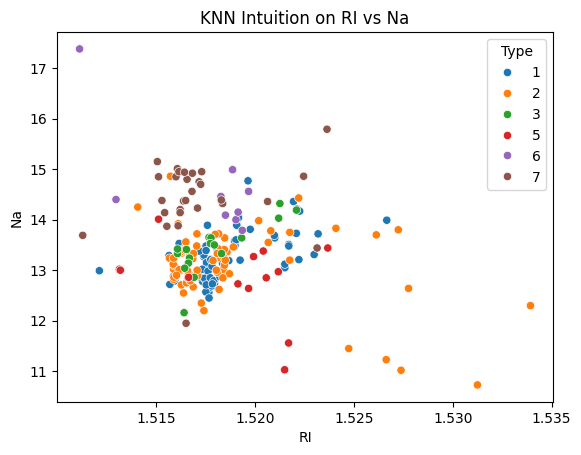

In [18]:
#Scatter plot defined
sns.scatterplot(data=df, x='RI', y='Na', hue='Type', palette='tab10')
#hue='Type' defines to color on the basis of Type of the datasets
#palette='tab10' defines the palette of the datasets
#It is built in feature in matplotlib

plt.xlabel("RI")
plt.ylabel("Na")
plt.title("KNN Intuition on RI vs Na")
plt.show()

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
#KNN model or algorithm

knn = KNeighborsClassifier(n_neighbors=5)  # start with k=5
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6976744186046512
              precision    recall  f1-score   support

           1       0.62      0.91      0.74        11
           2       0.62      0.57      0.59        14
           3       0.00      0.00      0.00         3
           5       0.50      0.25      0.33         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.70        43
   macro avg       0.60      0.62      0.60        43
weighted avg       0.64      0.70      0.66        43



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
decision=DecisionTreeClassifier()
decision.fit(X_train,y_train)
y_pred=decision.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7674418604651163
              precision    recall  f1-score   support

           1       0.67      0.91      0.77        11
           2       0.86      0.43      0.57        14
           3       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         4
           6       1.00      0.67      0.80         3
           7       0.73      1.00      0.84         8

    accuracy                           0.77        43
   macro avg       0.83      0.83      0.81        43
weighted avg       0.80      0.77      0.75        43



In [22]:
DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=42)


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

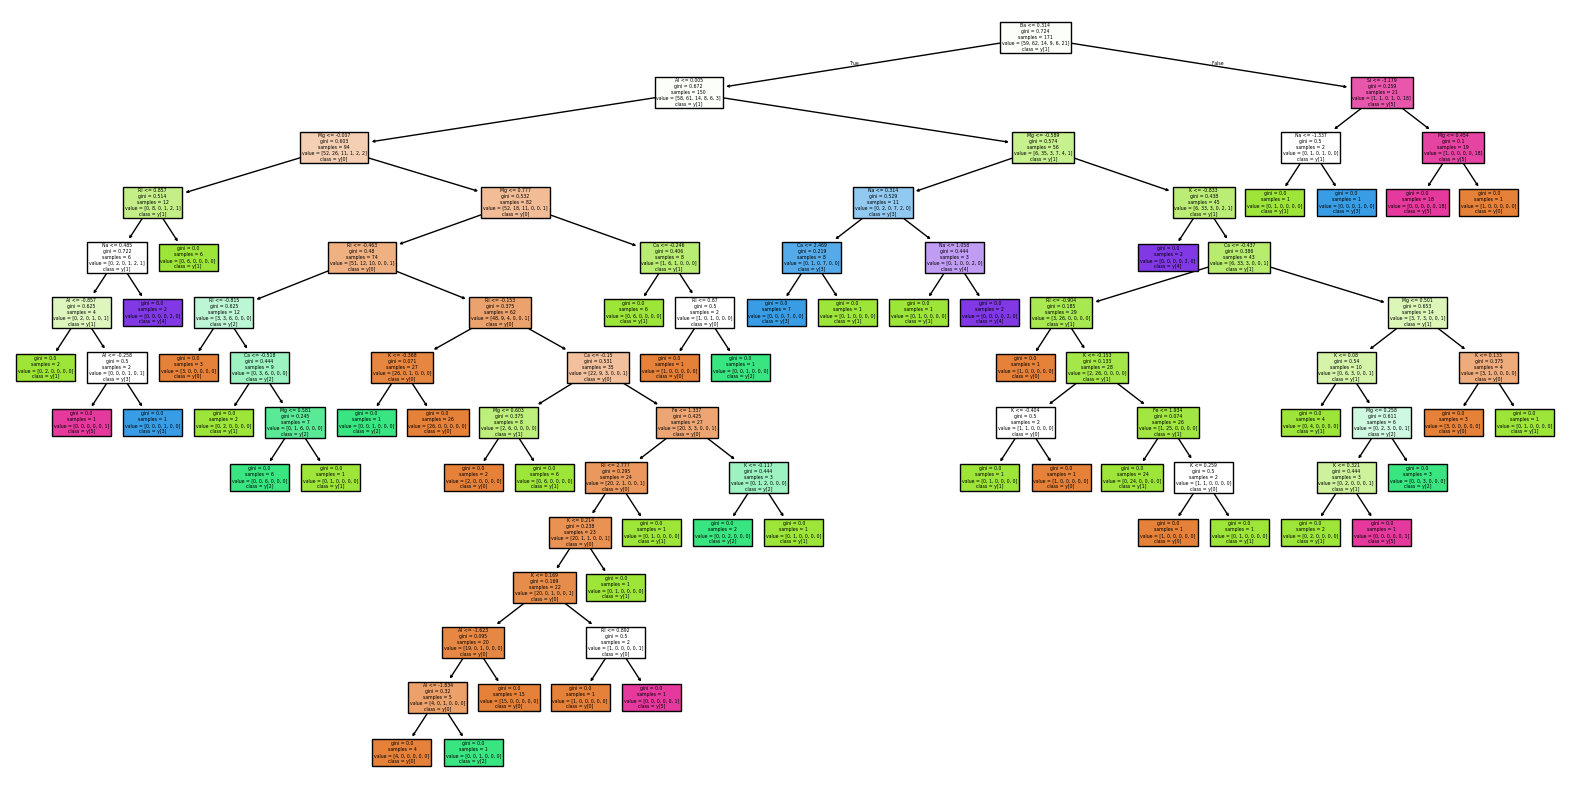

In [23]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(decision, filled=True, feature_names=X.columns, class_names=True)
plt.show()


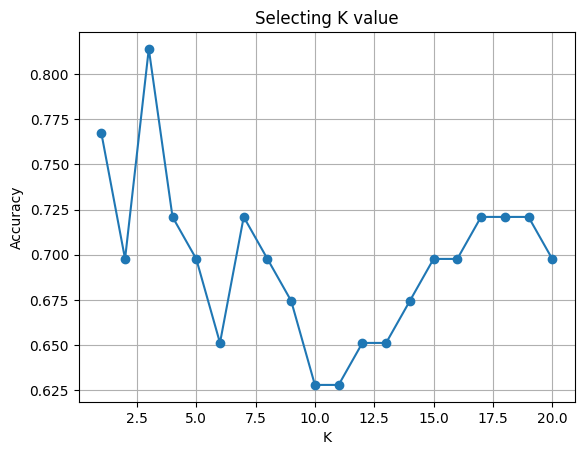

In [27]:
import matplotlib.pyplot as plt

accuracies = []
k_range = range(1, 21)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(k_range, accuracies, marker='o')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Selecting K value')
plt.grid()
plt.show()


/usr/local/lib/python3.11/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


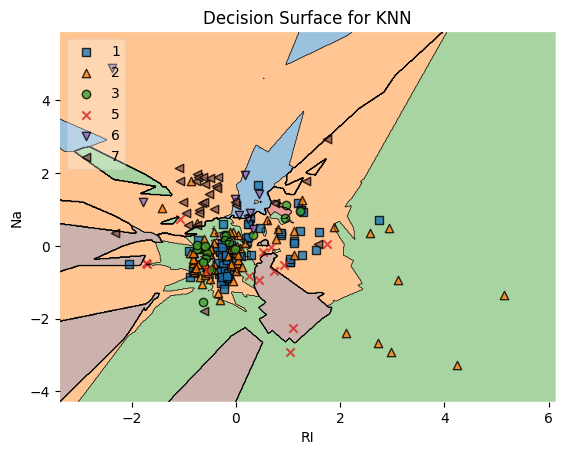

In [29]:
#From the figure, I think when the value of K lies between 2.5 and 5 it gives highest accuracy
#Therefore, it is wise idea to select K=(2.5, 5)
from mlxtend.plotting import plot_decision_regions
import numpy as np

# Take only 2 features for visualization (e.g., RI and Na)
X_vis = df[['RI', 'Na']].values
y_vis = df['Type'].values

# Scale
X_vis_scaled = StandardScaler().fit_transform(X_vis)

# Train KNN with 2D features
knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_vis_scaled, y_vis)

plot_decision_regions(X_vis_scaled, y_vis, clf=knn_vis, legend=2)
plt.xlabel("RI")
plt.ylabel("Na")
plt.title("Decision Surface for KNN")
plt.show()
import warnings
warnings.filterwarnings('ignore', category=UserWarning)



In [30]:
#Over-fitting and underfitting datasets
# Train accuracy
train_accuracy = decision.score(X_train, y_train)

# Test accuracy
test_accuracy = decision.score(X_test, y_test)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


Train Accuracy: 1.0
Test Accuracy: 0.7674418604651163


In [31]:
from sklearn.tree import DecisionTreeClassifier

# Pruned tree to prevent overfitting
decision = DecisionTreeClassifier(
    max_depth=4,
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42
)

decision.fit(X_train, y_train)
print("Train Accuracy:", decision.score(X_train, y_train))
print("Test Accuracy:", decision.score(X_test, y_test))


Train Accuracy: 0.7309941520467836
Test Accuracy: 0.6976744186046512


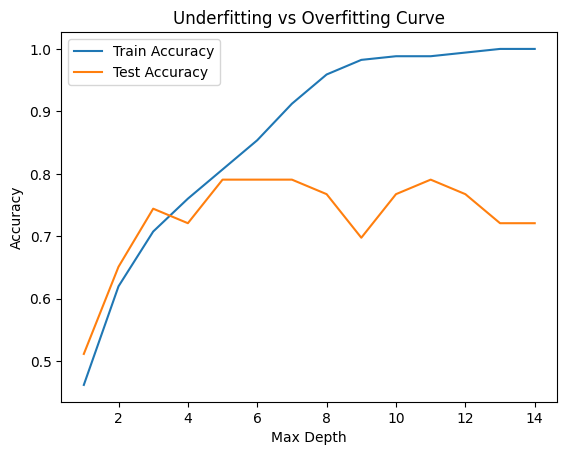

In [32]:
import matplotlib.pyplot as plt
train_scores = []
test_scores = []
depths = range(1, 15)

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

plt.plot(depths, train_scores, label='Train Accuracy')
plt.plot(depths, test_scores, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Underfitting vs Overfitting Curve')
plt.legend()
plt.show()


In [33]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean CV accuracy:", scores.mean())



Cross-validation scores: [0.53488372 0.60465116 0.58139535 0.6744186  0.69047619]
Mean CV accuracy: 0.6171650055370985


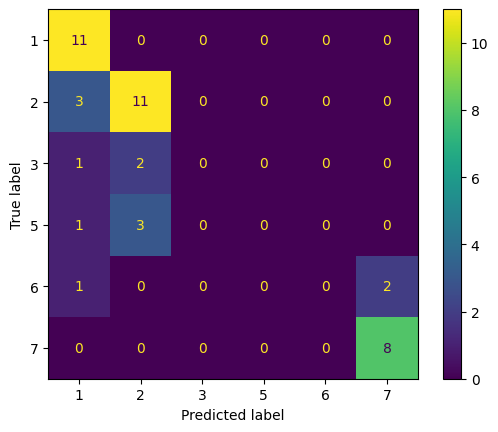

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)
